# Setup

Install missing packages

```bash
mamba install -c conda-forge -y ipykernel ipywidgets matplotlib numba numpy plotly pythreejs streamlit
```

or create new conda environment

```bash
mamba env create -f streamlit-plotly.yaml
```

Activate the newly created environment:

```bash
mamba activate streamlit-plotly
```

```bash
python -m ipykernel install --user --name=streamlit-plotly --display-name "Python (Streamlit-Plotly)"
```



In [13]:
!which python

/home/codespace/.python/current/bin/python


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

In [15]:
def draw_tree(x1, y1, angle, depth, angle_change, length_factor, linewidth_factor):
    if depth > 0:
        x2 = x1 + np.cos(angle) * depth * length_factor
        y2 = y1 + np.sin(angle) * depth * length_factor
        plt.plot([x1, x2], [y1, y2], color='green', linewidth=depth * linewidth_factor)
        draw_tree(x2, y2, angle - angle_change, depth - 1, angle_change, length_factor, linewidth_factor)
        draw_tree(x2, y2, angle + angle_change, depth - 1, angle_change, length_factor, linewidth_factor)


In [16]:
def plot_tree(depth, angle_deg, length_factor, linewidth_factor):
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    draw_tree(0, -100, np.pi/2, depth, np.deg2rad(angle_deg), length_factor, linewidth_factor)
    plt.show()


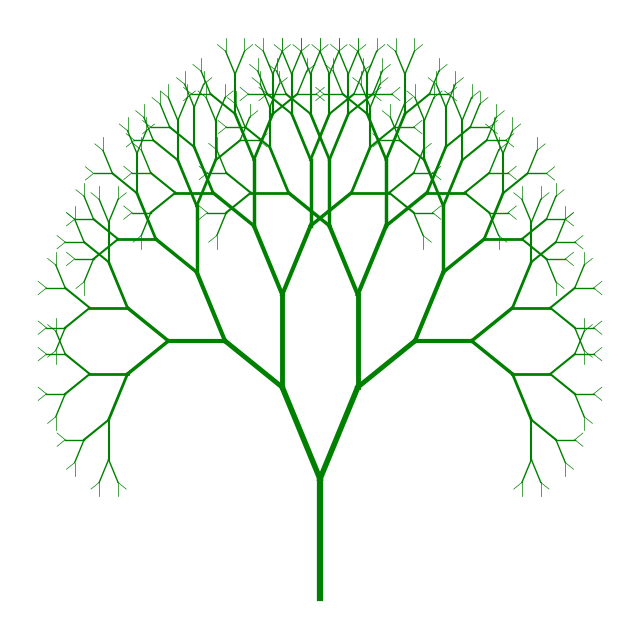

interactive(children=(IntSlider(value=9, description='Depth', max=15, min=1), FloatSlider(value=30.0, descript…

<function __main__.plot_tree(depth, angle_deg, length_factor, linewidth_factor)>

In [17]:
interact(
    plot_tree,
    depth=widgets.IntSlider(min=1, max=15, step=1, value=9, description='Depth'),
    angle_deg=widgets.FloatSlider(min=0, max=90, step=1, value=30, description='Branch Angle'),
    length_factor=widgets.FloatSlider(min=5, max=20, step=0.5, value=10, description='Branch Length'),
    linewidth_factor=widgets.FloatSlider(min=0.1, max=2, step=0.1, value=0.5, description='Branch Width')
)


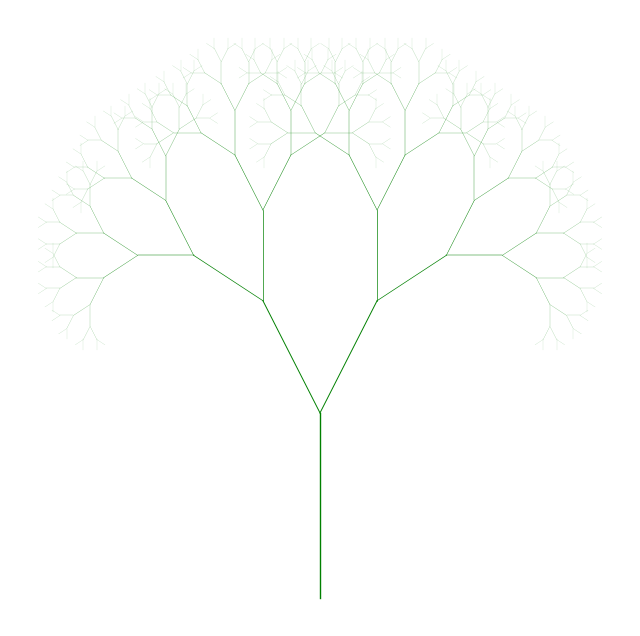

interactive(children=(IntSlider(value=9, description='Depth', max=15, min=1), FloatSlider(value=60.0, descript…

<function __main__.plot_tree(depth, angle_range_deg, length_factor, linewidth_factor, length_scale, width_scale, branching_factor, branching_scale)>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

def draw_tree(x1, y1, angle, depth, angle_range_deg, length_factor, linewidth_factor, length_scale, width_scale, branching_factor, branching_scale, initial_depth):
    if depth > 0:
        scale_exponent = initial_depth - depth
        scaled_length = length_factor * (length_scale ** scale_exponent)
        scaled_width = linewidth_factor * (width_scale ** scale_exponent)
        
        x2 = x1 + np.cos(angle) * scaled_length
        y2 = y1 + np.sin(angle) * scaled_length
        plt.plot([x1, x2], [y1, y2], color='green', linewidth=scaled_width)
        
        # Compute current branching factor
        current_branching_factor = max(1, int(branching_factor * (branching_scale ** scale_exponent)))
        
        angle_range = np.deg2rad(angle_range_deg)
        angles = np.linspace(angle - angle_range / 2, angle + angle_range / 2, current_branching_factor)
        for branch_angle in angles:
            draw_tree(x2, y2, branch_angle, depth - 1, angle_range_deg, length_factor, linewidth_factor, length_scale, width_scale, branching_factor, branching_scale, initial_depth)

def plot_tree(depth, angle_range_deg, length_factor, linewidth_factor, length_scale, width_scale, branching_factor, branching_scale):
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    draw_tree(0, -100, np.pi/2, depth, angle_range_deg, length_factor, linewidth_factor, length_scale, width_scale, branching_factor, branching_scale, depth)
    plt.show()
    
interact(
    plot_tree,
    depth=widgets.IntSlider(min=1, max=15, step=1, value=9, description='Depth'),
    angle_range_deg=widgets.FloatSlider(min=0, max=180, step=1, value=60, description='Angle Range'),
    length_factor=widgets.FloatSlider(min=1, max=100, step=1, value=10, description='Base Length'),
    linewidth_factor=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='Base Width'),
    length_scale=widgets.FloatSlider(min=0.5, max=1.5, step=0.1, value=0.7, description='Length Scale'),
    width_scale=widgets.FloatSlider(min=0.5, max=1.5, step=0.1, value=0.7, description='Width Scale'),
    branching_factor=widgets.IntSlider(min=1, max=5, step=1, value=2, description='Branches'),
    branching_scale=widgets.FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0, description='Branching Scale')
)


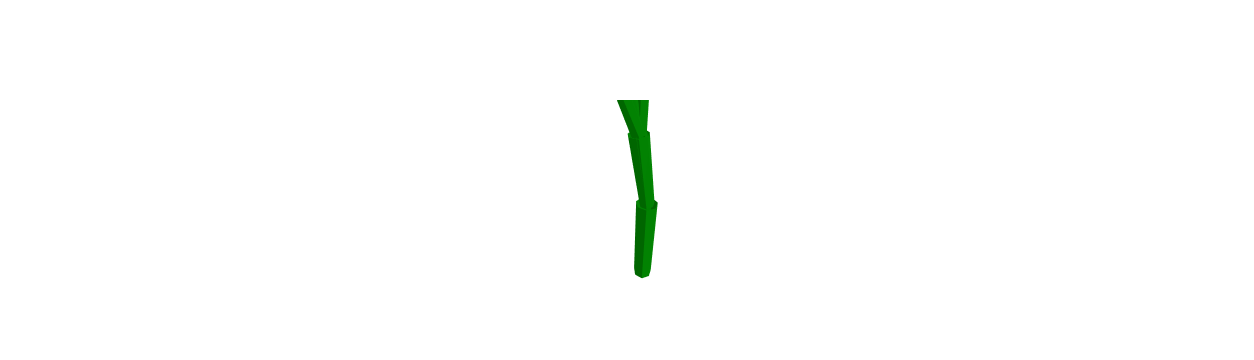

interactive(children=(IntSlider(value=4, description='Depth', max=8, min=1), FloatSlider(value=30.0, descripti…

<function __main__.plot_tree_3d(depth, angle_range_deg, length_factor, linewidth_factor, length_scale, width_scale, branching_factor, branching_scale)>

In [1]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact, widgets

def cylinder_between_points(p0, p1, radius, n=8):
    """
    Generate the mesh data for a cylinder between two points p0 and p1.
    """
    # Vector from p0 to p1
    v = np.array(p1) - np.array(p0)
    # Length of the cylinder
    length = np.linalg.norm(v)
    if length == 0:
        return None  # Avoid division by zero
    # Unit vector in direction of cylinder axis
    v = v / length

    # Create arbitrary vectors orthogonal to v
    not_v = np.array([1, 0, 0])
    if (v == not_v).all():
        not_v = np.array([0, 1, 0])
    n1 = np.cross(v, not_v)
    n1 /= np.linalg.norm(n1)
    n2 = np.cross(v, n1)

    # Generate circle points in the plane orthogonal to v
    t = np.linspace(0, 2 * np.pi, n)
    circle = np.array([np.cos(t), np.sin(t)])
    circle_pts = radius * (np.outer(n1, circle[0]) + np.outer(n2, circle[1]))

    # Points at base and top of cylinder
    x_base = p0[0] + circle_pts[0]
    y_base = p0[1] + circle_pts[1]
    z_base = p0[2] + circle_pts[2]

    x_top = x_base + v[0] * length
    y_top = y_base + v[1] * length
    z_top = z_base + v[2] * length

    # Combine base and top points
    x = np.concatenate([x_base, x_top])
    y = np.concatenate([y_base, y_top])
    z = np.concatenate([z_base, z_top])

    # Define faces of the cylinder
    faces = []
    n_points = n
    for i in range(n_points):
        next_i = (i + 1) % n_points
        # Side faces
        faces.append([i, next_i, n_points + next_i])
        faces.append([i, n_points + next_i, n_points + i])
    return x, y, z, faces

def draw_tree_3d(x1, y1, z1, theta, phi, depth, angle_range_deg, length_factor,
                 linewidth_factor, length_scale, width_scale, branching_factor,
                 branching_scale, initial_depth, cylinders):
    if depth > 0:
        scale_exponent = initial_depth - depth
        scaled_length = length_factor * (length_scale ** scale_exponent)
        scaled_width = linewidth_factor * (width_scale ** scale_exponent)

        # Compute the direction vector
        direction = np.array([
            np.sin(theta) * np.cos(phi),
            np.sin(theta) * np.sin(phi),
            np.cos(theta)
        ])

        # Compute the new point
        x2 = x1 + direction[0] * scaled_length
        y2 = y1 + direction[1] * scaled_length
        z2 = z1 + direction[2] * scaled_length

        # Store the cylinder data
        cylinder_data = cylinder_between_points(
            [x1, y1, z1],
            [x2, y2, z2],
            scaled_width
        )
        if cylinder_data:
            x_cyl, y_cyl, z_cyl, faces = cylinder_data
            cylinders.append({
                'x': x_cyl,
                'y': y_cyl,
                'z': z_cyl,
                'faces': faces,
                'color': 'green'
            })

        # Compute current branching factor
        current_branching_factor = max(1, int(branching_factor * (branching_scale ** scale_exponent)))

        # Generate new branches
        angle_range_rad = np.deg2rad(angle_range_deg)

        for _ in range(current_branching_factor):
            # Random angles within the specified range
            delta_theta = angle_range_rad * (np.random.rand() - 0.5)
            delta_phi = angle_range_rad * (np.random.rand() - 0.5)
            new_theta = theta + delta_theta
            new_phi = phi + delta_phi
            # Recursive call
            draw_tree_3d(
                x2, y2, z2, new_theta, new_phi, depth - 1, angle_range_deg,
                length_factor, linewidth_factor, length_scale, width_scale,
                branching_factor, branching_scale, initial_depth, cylinders
            )

def plot_tree_3d(depth, angle_range_deg, length_factor, linewidth_factor,
                 length_scale, width_scale, branching_factor, branching_scale):
    cylinders = []
    initial_theta = 0  # Initial angle from z-axis
    initial_phi = 0    # Initial angle in x-y plane
    initial_depth = depth
    draw_tree_3d(
        0, 0, 0, initial_theta, initial_phi, depth, angle_range_deg,
        length_factor, linewidth_factor, length_scale, width_scale,
        branching_factor, branching_scale, initial_depth, cylinders
    )

    # Prepare data for plotting
    fig = go.Figure()
    for cyl in cylinders:
        fig.add_trace(go.Mesh3d(
            x=cyl['x'],
            y=cyl['y'],
            z=cyl['z'],
            color=cyl['color'],
            opacity=1.0,
            i=[face[0] for face in cyl['faces']],
            j=[face[1] for face in cyl['faces']],
            k=[face[2] for face in cyl['faces']],
            flatshading=True,
            showscale=False
        ))

    fig.update_layout(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False),
            aspectmode='data'
        ),
        showlegend=False
    )
    fig.show()

interact(
    plot_tree_3d,
    depth=widgets.IntSlider(min=1, max=8, step=1, value=4, description='Depth'),
    angle_range_deg=widgets.FloatSlider(min=0, max=180, step=1, value=30, description='Angle Range'),
    length_factor=widgets.FloatSlider(min=1, max=10, step=1, value=5, description='Base Length'),
    linewidth_factor=widgets.FloatSlider(min=0.1, max=2, step=0.1, value=0.5, description='Base Width'),
    length_scale=widgets.FloatSlider(min=0.5, max=1.5, step=0.05, value=0.7, description='Length Scale'),
    width_scale=widgets.FloatSlider(min=0.5, max=1.0, step=0.05, value=0.7, description='Width Scale'),
    branching_factor=widgets.IntSlider(min=1, max=5, step=1, value=2, description='Branches'),
    branching_scale=widgets.FloatSlider(min=0.5, max=1.0, step=0.1, value=1.0, description='Branching Scale')
)


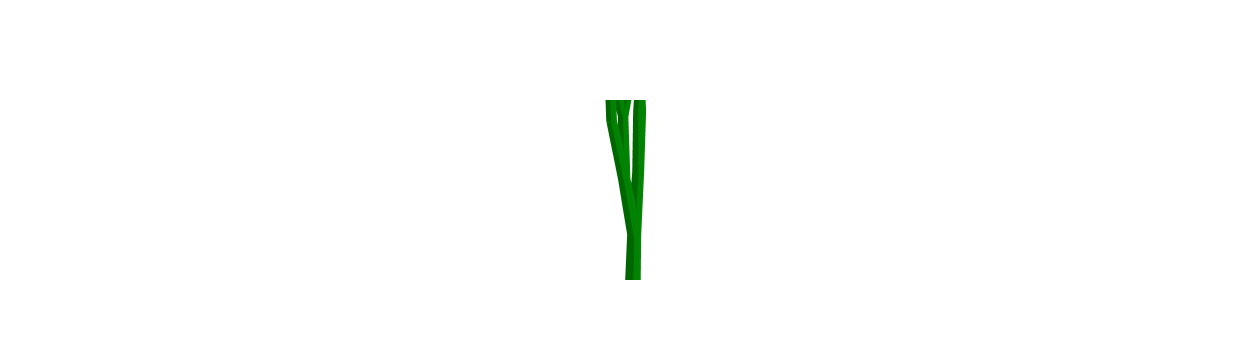

interactive(children=(IntSlider(value=8, description='Depth', max=16, min=1), FloatSlider(value=30.0, descript…

<function __main__.plot_tree_3d(depth, angle_range_deg, length_factor, linewidth_factor, length_scale, width_scale, branching_factor, branching_scale)>

In [3]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact, widgets

def cylinder_between_points(p0, p1, radius_base, radius_top, n=8):
    """
    Generate the mesh data for a tapered cylinder (frustum) between two points p0 and p1.
    """
    # Vector from p0 to p1
    v = np.array(p1) - np.array(p0)
    # Length of the cylinder
    length = np.linalg.norm(v)
    if length == 0:
        return None  # Avoid division by zero
    # Unit vector in direction of cylinder axis
    v = v / length

    # Create arbitrary vectors orthogonal to v
    not_v = np.array([1, 0, 0])
    if (v == not_v).all():
        not_v = np.array([0, 1, 0])
    n1 = np.cross(v, not_v)
    n1 /= np.linalg.norm(n1)
    n2 = np.cross(v, n1)

    # Generate circle points in the plane orthogonal to v
    t = np.linspace(0, 2 * np.pi, n, endpoint=False)
    circle_base = np.array([np.cos(t), np.sin(t)]) * radius_base
    circle_top = np.array([np.cos(t), np.sin(t)]) * radius_top

    # Base circle points
    x_base = p0[0] + n1[0] * circle_base[0] + n2[0] * circle_base[1]
    y_base = p0[1] + n1[1] * circle_base[0] + n2[1] * circle_base[1]
    z_base = p0[2] + n1[2] * circle_base[0] + n2[2] * circle_base[1]

    # Top circle points
    x_top = p1[0] + n1[0] * circle_top[0] + n2[0] * circle_top[1]
    y_top = p1[1] + n1[1] * circle_top[0] + n2[1] * circle_top[1]
    z_top = p1[2] + n1[2] * circle_top[0] + n2[2] * circle_top[1]

    # Combine base and top points
    x = np.concatenate([x_base, x_top])
    y = np.concatenate([y_base, y_top])
    z = np.concatenate([z_base, z_top])

    # Define faces of the cylinder
    faces = []
    n_points = n
    for i in range(n_points):
        next_i = (i + 1) % n_points
        # Side faces (two triangles per side)
        faces.append([i, next_i, n_points + next_i])
        faces.append([i, n_points + next_i, n_points + i])
    return x, y, z, faces

def draw_tree_3d(x1, y1, z1, theta, phi, depth, angle_range_deg, length_factor,
                 linewidth_factor, length_scale, width_scale, branching_factor,
                 branching_scale, initial_depth, cylinders):
    if depth > 0:
        scale_exponent = initial_depth - depth
        scaled_length = length_factor * (length_scale ** scale_exponent)
        scaled_width_base = linewidth_factor * (width_scale ** scale_exponent)
        # Calculate the top width
        scaled_width_top = linewidth_factor * (width_scale ** (scale_exponent + 1))

        # Compute the direction vector
        direction = np.array([
            np.sin(theta) * np.cos(phi),
            np.sin(theta) * np.sin(phi),
            np.cos(theta)
        ])

        # Compute the new point
        x2 = x1 + direction[0] * scaled_length
        y2 = y1 + direction[1] * scaled_length
        z2 = z1 + direction[2] * scaled_length

        # Store the cylinder data
        cylinder_data = cylinder_between_points(
            [x1, y1, z1],
            [x2, y2, z2],
            scaled_width_base,
            scaled_width_top
        )
        if cylinder_data:
            x_cyl, y_cyl, z_cyl, faces = cylinder_data
            cylinders.append({
                'x': x_cyl,
                'y': y_cyl,
                'z': z_cyl,
                'faces': faces,
                'color': 'green'
            })

        # Compute current branching factor
        current_branching_factor = max(1, int(branching_factor * (branching_scale ** scale_exponent)))

        # Generate new branches
        angle_range_rad = np.deg2rad(angle_range_deg)

        for _ in range(current_branching_factor):
            # Random angles within the specified range
            delta_theta = angle_range_rad * (np.random.rand() - 0.5)
            delta_phi = angle_range_rad * (np.random.rand() - 0.5)
            new_theta = theta + delta_theta
            new_phi = phi + delta_phi
            # Recursive call
            draw_tree_3d(
                x2, y2, z2, new_theta, new_phi, depth - 1, angle_range_deg,
                length_factor, linewidth_factor, length_scale, width_scale,
                branching_factor, branching_scale, initial_depth, cylinders
            )

def plot_tree_3d(depth, angle_range_deg, length_factor, linewidth_factor,
                 length_scale, width_scale, branching_factor, branching_scale):
    cylinders = []
    initial_theta = 0  # Initial angle from z-axis
    initial_phi = 0    # Initial angle in x-y plane
    initial_depth = depth
    draw_tree_3d(
        0, 0, 0, initial_theta, initial_phi, depth, angle_range_deg,
        length_factor, linewidth_factor, length_scale, width_scale,
        branching_factor, branching_scale, initial_depth, cylinders
    )

    # Prepare data for plotting
    fig = go.Figure()
    for cyl in cylinders:
        fig.add_trace(go.Mesh3d(
            x=cyl['x'],
            y=cyl['y'],
            z=cyl['z'],
            color=cyl['color'],
            opacity=1.0,
            i=[face[0] for face in cyl['faces']],
            j=[face[1] for face in cyl['faces']],
            k=[face[2] for face in cyl['faces']],
            flatshading=True,
            showscale=False
        ))

    fig.update_layout(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False),
            aspectmode='data'
        ),
        showlegend=False
    )
    fig.show()

interact(
    plot_tree_3d,
    depth=widgets.IntSlider(min=1, max=16, step=1, value=8, description='Depth'),
    angle_range_deg=widgets.FloatSlider(min=0, max=180, step=1, value=30, description='Angle Range'),
    length_factor=widgets.FloatSlider(min=1, max=10, step=1, value=5, description='Base Length'),
    linewidth_factor=widgets.FloatSlider(min=0.1, max=2, step=0.1, value=0.5, description='Base Width'),
    length_scale=widgets.FloatSlider(min=0.5, max=2, step=0.05, value=0.7, description='Length Scale'),
    width_scale=widgets.FloatSlider(min=0.5, max=2, step=0.05, value=0.7, description='Width Scale'),
    branching_factor=widgets.IntSlider(min=1, max=10, step=1, value=2, description='Branches'),
    branching_scale=widgets.FloatSlider(min=0.5, max=1.0, step=0.1, value=1.0, description='Branching Scale')
)


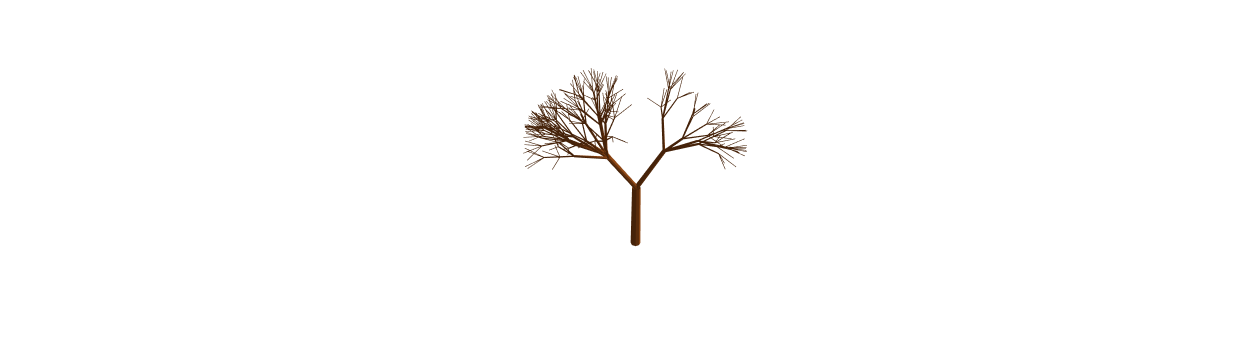

interactive(children=(IntSlider(value=5, description='Levels', max=8, min=1), FloatSlider(value=7.0, descripti…

<function __main__.plot_tree(levels, trunk_length, trunk_radius, angle_deg, length_reduction, branches_per_level)>

In [2]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact, widgets

def cylinder_mesh(p0, p1, radius_base, radius_top, sections=8):
    """
    Generate mesh data for a tapered cylinder (frustum) between two points.
    """
    # Vector from p0 to p1
    v = np.array(p1) - np.array(p0)
    # Length of the cylinder
    length = np.linalg.norm(v)
    if length == 0:
        return None
    # Unit vector in direction of the cylinder
    v = v / length

    # Create arbitrary vectors orthogonal to v
    not_v = np.array([1, 0, 0])
    if np.allclose(v, not_v):
        not_v = np.array([0, 1, 0])
    n1 = np.cross(v, not_v)
    n1 /= np.linalg.norm(n1)
    n2 = np.cross(v, n1)

    # Create circle points in the plane orthogonal to v
    t = np.linspace(0, 2 * np.pi, sections, endpoint=False)
    circle_base = n1[:, None] * np.cos(t)[None, :] + n2[:, None] * np.sin(t)[None, :]
    circle_top = circle_base.copy()

    # Scale circles by radii
    circle_base *= radius_base
    circle_top *= radius_top

    # Points at base and top
    base_points = p0[:, None] + circle_base
    top_points = p1[:, None] + circle_top

    # Combine points
    x = np.hstack([base_points[0], top_points[0]])
    y = np.hstack([base_points[1], top_points[1]])
    z = np.hstack([base_points[2], top_points[2]])

    # Create faces
    faces = []
    n = sections
    for i in range(n):
        next_i = (i + 1) % n
        faces.append([i, next_i, n + next_i])
        faces.append([i, n + next_i, n + i])
    return x, y, z, faces

def rotate_vector(v, k, theta):
    """
    Rotate vector v around axis k by angle theta using Rodrigues' rotation formula.
    """
    v_rot = v * np.cos(theta) + np.cross(k, v) * np.sin(theta) + k * np.dot(k, v) * (1 - np.cos(theta))
    return v_rot

def grow_tree(p0, direction, length, radius_base, levels, angle, length_reduction, branches_per_level, tree_elements):
    """
    Recursively grow the tree from point p0 in a given direction.
    """
    if levels == 0:
        return

    p1 = p0 + direction * length

    # Calculate the top radius (tapering)
    radius_top = radius_base * 0.8  # Simple tapering factor

    # Add the cylinder representing the trunk or branch
    cylinder = cylinder_mesh(p0, p1, radius_base, radius_top)
    if cylinder:
        x, y, z, faces = cylinder
        tree_elements.append({
            'x': x,
            'y': y,
            'z': z,
            'faces': faces,
            'color': 'saddlebrown'
        })

    # Calculate child branch parameters
    length_child = length * length_reduction
    N = branches_per_level
    radius_child = radius_base * np.sqrt((radius_top / radius_base)**2 * length / (N * length_child))

    # Generate branches at this level
    for _ in range(N):
        # Random rotation for natural appearance
        theta = angle + (np.random.rand() - 0.5) * np.deg2rad(10)
        phi = np.random.rand() * 2 * np.pi

        # Spherical to Cartesian coordinates
        new_direction = np.array([
            np.sin(theta) * np.cos(phi),
            np.sin(theta) * np.sin(phi),
            np.cos(theta)
        ])
        new_direction = new_direction / np.linalg.norm(new_direction)

        # Rotate new_direction to align with the parent branch direction
        rotation_axis = np.cross([0, 0, 1], direction)
        rotation_angle = np.arccos(np.clip(np.dot(direction, [0, 0, 1]), -1.0, 1.0))
        if np.linalg.norm(rotation_axis) > 1e-6:
            rotation_axis /= np.linalg.norm(rotation_axis)
            new_direction = rotate_vector(new_direction, rotation_axis, rotation_angle)

        # Recursive call to grow the branch
        grow_tree(
            p1,
            new_direction,
            length_child,
            radius_child,
            levels - 1,
            angle,
            length_reduction,
            branches_per_level,
            tree_elements
        )

def plot_tree(levels, trunk_length, trunk_radius, angle_deg, length_reduction, branches_per_level):
    tree_elements = []
    # Start with the main trunk
    p0 = np.array([0, 0, 0])
    direction = np.array([0, 0, 1])  # Grow along z-axis
    angle_rad = np.deg2rad(angle_deg)
    grow_tree(
        p0,
        direction,
        trunk_length,
        trunk_radius,
        levels,
        angle_rad,
        length_reduction,
        branches_per_level,
        tree_elements
    )

    # Plotting
    fig = go.Figure()
    for elem in tree_elements:
        fig.add_trace(go.Mesh3d(
            x=elem['x'],
            y=elem['y'],
            z=elem['z'],
            i=[face[0] for face in elem['faces']],
            j=[face[1] for face in elem['faces']],
            k=[face[2] for face in elem['faces']],
            color=elem['color'],
            flatshading=True,
            lighting=dict(ambient=0.5, diffuse=0.8, roughness=0.9),
            showscale=False
        ))
    fig.update_layout(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False),
            aspectmode='data'
        ),
        showlegend=False,
        margin=dict(l=0, r=0, t=0, b=0)
    )
    fig.show()

# Interactive widgets
interact(
    plot_tree,
    levels=widgets.IntSlider(min=1, max=8, step=1, value=5, description='Levels'),
    trunk_length=widgets.FloatSlider(min=1, max=15, step=0.5, value=7, description='Trunk Length'),
    trunk_radius=widgets.FloatSlider(min=0.1, max=1.5, step=0.1, value=0.5, description='Trunk Radius'),
    angle_deg=widgets.FloatSlider(min=10, max=80, step=5, value=30, description='Branch Angle'),
    length_reduction=widgets.FloatSlider(min=0.4, max=0.9, step=0.05, value=0.7, description='Length Reduction'),
    branches_per_level=widgets.IntSlider(min=1, max=8, step=1, value=4, description='Branches/Level')
)


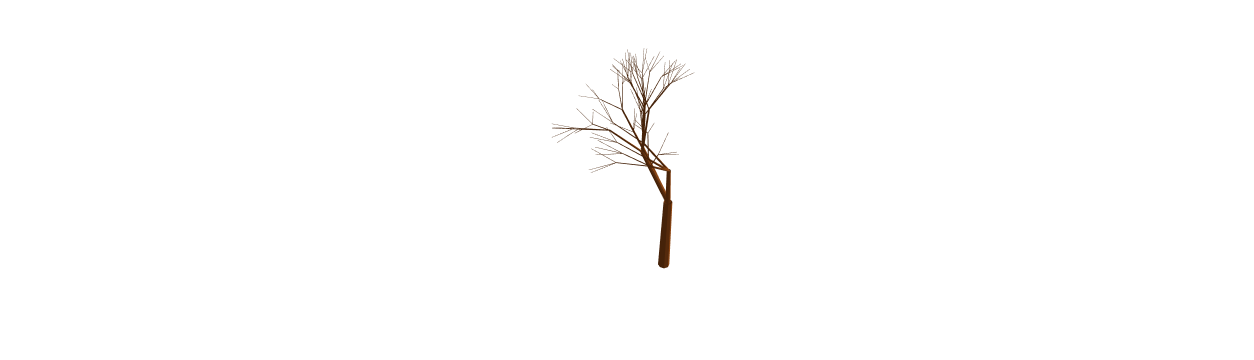

interactive(children=(IntSlider(value=5, description='Levels', max=8, min=1), FloatSlider(value=7.0, descripti…

<function __main__.plot_tree(levels, trunk_length, trunk_radius, taper_ratio, angle_deg, length_reduction, branches_per_level)>

In [4]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact, widgets

def cylinder_mesh(p0, p1, radius_base, radius_top, sections=8):
    """
    Generate mesh data for a tapered cylinder (frustum) between two points.
    """
    # Vector from p0 to p1
    v = np.array(p1) - np.array(p0)
    # Length of the cylinder
    length = np.linalg.norm(v)
    if length == 0:
        return None
    # Unit vector in direction of the cylinder
    v = v / length

    # Create arbitrary vectors orthogonal to v
    not_v = np.array([1, 0, 0])
    if np.allclose(v, not_v):
        not_v = np.array([0, 1, 0])
    n1 = np.cross(v, not_v)
    n1 /= np.linalg.norm(n1)
    n2 = np.cross(v, n1)

    # Create circle points in the plane orthogonal to v
    t = np.linspace(0, 2 * np.pi, sections, endpoint=False)
    circle_base = n1[:, None] * np.cos(t)[None, :] + n2[:, None] * np.sin(t)[None, :]
    circle_top = circle_base.copy()

    # Scale circles by radii
    circle_base *= radius_base
    circle_top *= radius_top

    # Points at base and top
    base_points = p0[:, None] + circle_base
    top_points = p1[:, None] + circle_top

    # Combine points
    x = np.hstack([base_points[0], top_points[0]])
    y = np.hstack([base_points[1], top_points[1]])
    z = np.hstack([base_points[2], top_points[2]])

    # Create faces
    faces = []
    n = sections
    for i in range(n):
        next_i = (i + 1) % n
        faces.append([i, next_i, n + next_i])
        faces.append([i, n + next_i, n + i])
    return x, y, z, faces

def rotate_vector(v, k, theta):
    """
    Rotate vector v around axis k by angle theta using Rodrigues' rotation formula.
    """
    v_rot = v * np.cos(theta) + np.cross(k, v) * np.sin(theta) + k * np.dot(k, v) * (1 - np.cos(theta))
    return v_rot

def grow_tree(p0, direction, length, radius_base, taper_ratio, levels, angle, length_reduction, branches_per_level, tree_elements):
    """
    Recursively grow the tree from point p0 in a given direction.
    """
    if levels == 0:
        return

    # Calculate end point of the current branch
    p1 = p0 + direction * length

    # Calculate top radius using consistent tapering
    radius_top = radius_base * taper_ratio

    # Add the cylinder representing the trunk or branch
    cylinder = cylinder_mesh(p0, p1, radius_base, radius_top)
    if cylinder:
        x, y, z, faces = cylinder
        tree_elements.append({
            'x': x,
            'y': y,
            'z': z,
            'faces': faces,
            'color': 'saddlebrown'
        })

    # Calculate base radius of child branches
    N = branches_per_level
    radius_base_child = radius_top / np.sqrt(N)

    # Ensure the base radius of child branches equals the top radius of the parent branch divided by sqrt(N)
    # Calculate top radius of child branches using the same taper ratio
    radius_top_child = radius_base_child * taper_ratio

    # Length of child branches
    length_child = length * length_reduction

    # Generate branches at this level
    for _ in range(N):
        # Random rotation for natural appearance
        theta = angle + (np.random.rand() - 0.5) * np.deg2rad(10)
        phi = np.random.rand() * 2 * np.pi

        # Spherical to Cartesian coordinates
        new_direction = np.array([
            np.sin(theta) * np.cos(phi),
            np.sin(theta) * np.sin(phi),
            np.cos(theta)
        ])
        new_direction = new_direction / np.linalg.norm(new_direction)

        # Rotate new_direction to align with the parent branch direction
        rotation_axis = np.cross([0, 0, 1], direction)
        rotation_angle = np.arccos(np.clip(np.dot(direction, [0, 0, 1]), -1.0, 1.0))
        if np.linalg.norm(rotation_axis) > 1e-6:
            rotation_axis /= np.linalg.norm(rotation_axis)
            new_direction = rotate_vector(new_direction, rotation_axis, rotation_angle)

        # Recursive call to grow the branch
        grow_tree(
            p1,
            new_direction,
            length_child,
            radius_base_child,
            taper_ratio,
            levels - 1,
            angle,
            length_reduction,
            branches_per_level,
            tree_elements
        )

def plot_tree(levels, trunk_length, trunk_radius, taper_ratio, angle_deg, length_reduction, branches_per_level):
    tree_elements = []
    # Start with the main trunk
    p0 = np.array([0, 0, 0])
    direction = np.array([0, 0, 1])  # Grow along z-axis
    angle_rad = np.deg2rad(angle_deg)
    grow_tree(
        p0,
        direction,
        trunk_length,
        trunk_radius,
        taper_ratio,
        levels,
        angle_rad,
        length_reduction,
        branches_per_level,
        tree_elements
    )

    # Plotting
    fig = go.Figure()
    for elem in tree_elements:
        fig.add_trace(go.Mesh3d(
            x=elem['x'],
            y=elem['y'],
            z=elem['z'],
            i=[face[0] for face in elem['faces']],
            j=[face[1] for face in elem['faces']],
            k=[face[2] for face in elem['faces']],
            color=elem['color'],
            flatshading=True,
            lighting=dict(ambient=0.5, diffuse=0.8, roughness=0.9),
            showscale=False
        ))
    fig.update_layout(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False),
            aspectmode='data'
        ),
        showlegend=False,
        margin=dict(l=0, r=0, t=0, b=0)
    )
    fig.show()

# Interactive widgets
interact(
    plot_tree,
    levels=widgets.IntSlider(min=1, max=8, step=1, value=5, description='Levels'),
    trunk_length=widgets.FloatSlider(min=1, max=15, step=0.5, value=7, description='Trunk Length'),
    trunk_radius=widgets.FloatSlider(min=0.1, max=1.5, step=0.1, value=0.5, description='Trunk Radius'),
    taper_ratio=widgets.FloatSlider(min=0.5, max=1.0, step=0.05, value=0.7, description='Taper Ratio'),
    angle_deg=widgets.FloatSlider(min=10, max=80, step=5, value=30, description='Branch Angle'),
    length_reduction=widgets.FloatSlider(min=0.5, max=1.0, step=0.05, value=0.7, description='Length Reduction'),
    branches_per_level=widgets.IntSlider(min=1, max=8, step=1, value=3, description='Branches/Level')
)


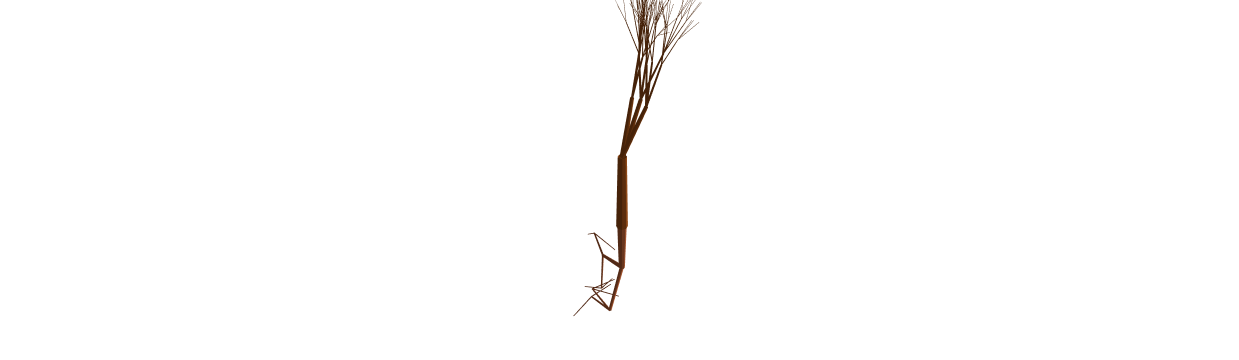

interactive(children=(IntSlider(value=5, description='Crown Levels', max=8, min=1), FloatSlider(value=7.0, des…

<function __main__.plot_tree(crown_levels, crown_length, crown_radius, crown_taper_ratio, crown_angle_deg, crown_length_reduction, crown_branches_per_level, root_levels, root_length, root_radius, root_taper_ratio, root_angle_deg, root_length_reduction, root_branches_per_level)>

In [5]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact, widgets

def cylinder_mesh(p0, p1, radius_base, radius_top, sections=8):
    """
    Generate mesh data for a tapered cylinder (frustum) between two points.
    """
    # Vector from p0 to p1
    v = np.array(p1) - np.array(p0)
    # Length of the cylinder
    length = np.linalg.norm(v)
    if length == 0:
        return None
    # Unit vector in direction of the cylinder
    v = v / length

    # Create arbitrary vectors orthogonal to v
    not_v = np.array([1, 0, 0])
    if np.allclose(v, not_v):
        not_v = np.array([0, 1, 0])
    n1 = np.cross(v, not_v)
    n1 /= np.linalg.norm(n1)
    n2 = np.cross(v, n1)

    # Create circle points in the plane orthogonal to v
    t = np.linspace(0, 2 * np.pi, sections, endpoint=False)
    circle_base = n1[:, None] * np.cos(t)[None, :] + n2[:, None] * np.sin(t)[None, :]
    circle_top = circle_base.copy()

    # Scale circles by radii
    circle_base *= radius_base
    circle_top *= radius_top

    # Points at base and top
    base_points = p0[:, None] + circle_base
    top_points = p1[:, None] + circle_top

    # Combine points
    x = np.hstack([base_points[0], top_points[0]])
    y = np.hstack([base_points[1], top_points[1]])
    z = np.hstack([base_points[2], top_points[2]])

    # Create faces
    faces = []
    n = sections
    for i in range(n):
        next_i = (i + 1) % n
        faces.append([i, next_i, n + next_i])
        faces.append([i, n + next_i, n + i])
    return x, y, z, faces

def rotate_vector(v, k, theta):
    """
    Rotate vector v around axis k by angle theta using Rodrigues' rotation formula.
    """
    v_rot = v * np.cos(theta) + np.cross(k, v) * np.sin(theta) + k * np.dot(k, v) * (1 - np.cos(theta))
    return v_rot

def grow_tree(p0, direction, length, radius_base, taper_ratio, levels, angle, length_reduction,
              branches_per_level, tree_elements, is_root=False):
    """
    Recursively grow the tree from point p0 in a given direction.
    """
    if levels == 0 or radius_base < 0.01 or length < 0.01:
        return

    # Calculate end point of the current branch
    p1 = p0 + direction * length

    # Ensure roots do not grow above ground level
    if is_root and p1[2] > 0:
        p1[2] = 0

    # Calculate top radius using consistent tapering
    radius_top = radius_base * taper_ratio

    # Add the cylinder representing the trunk or branch
    cylinder = cylinder_mesh(p0, p1, radius_base, radius_top)
    if cylinder:
        x, y, z, faces = cylinder
        tree_elements.append({
            'x': x,
            'y': y,
            'z': z,
            'faces': faces,
            'color': 'saddlebrown' if not is_root else 'sienna'
        })

    # Calculate base radius of child branches
    N = branches_per_level
    if N > 0:
        radius_base_child = radius_top / np.sqrt(N)
    else:
        radius_base_child = 0

    # Length of child branches
    length_child = length * length_reduction

    # Generate branches at this level
    for _ in range(N):
        # Random rotation for natural appearance
        if is_root:
            # For roots, theta ranges from π/2 to π (90° to 180°), pointing downward
            min_theta = np.pi / 2
            max_theta = np.pi / 2 + angle
            theta = min_theta + np.random.rand() * (max_theta - min_theta)
        else:
            # For crown, theta ranges from 0 to angle (pointing upward)
            min_theta = 0
            max_theta = angle
            theta = min_theta + np.random.rand() * (max_theta - min_theta)

        # Add small random variation
        theta += (np.random.rand() - 0.5) * np.deg2rad(10)
        phi = np.random.rand() * 2 * np.pi

        # Ensure theta is within valid range
        if is_root:
            theta = np.clip(theta, np.pi / 2, np.pi)
        else:
            theta = np.clip(theta, 0, np.pi / 2)

        # Spherical to Cartesian coordinates
        new_direction = np.array([
            np.sin(theta) * np.cos(phi),
            np.sin(theta) * np.sin(phi),
            np.cos(theta)
        ])

        # Rotate new_direction to align with the parent branch direction
        rotation_axis = np.cross([0, 0, 1], direction)
        rotation_angle = np.arccos(np.clip(np.dot(direction, [0, 0, 1]), -1.0, 1.0))
        if np.linalg.norm(rotation_axis) > 1e-6:
            rotation_axis /= np.linalg.norm(rotation_axis)
            new_direction = rotate_vector(new_direction, rotation_axis, rotation_angle)

        # Recursive call to grow the branch
        grow_tree(
            p1,
            new_direction,
            length_child,
            radius_base_child,
            taper_ratio,
            levels - 1,
            angle,
            length_reduction,
            branches_per_level,
            tree_elements,
            is_root=is_root
        )

def plot_tree(
    # Crown parameters
    crown_levels, crown_length, crown_radius, crown_taper_ratio, crown_angle_deg, crown_length_reduction, crown_branches_per_level,
    # Root parameters
    root_levels, root_length, root_radius, root_taper_ratio, root_angle_deg, root_length_reduction, root_branches_per_level
):
    tree_elements = []
    # Start with the main trunk (above ground)
    p0 = np.array([0, 0, 0])
    direction = np.array([0, 0, 1])  # Grow upwards
    crown_angle_rad = np.deg2rad(crown_angle_deg)
    grow_tree(
        p0,
        direction,
        crown_length,
        crown_radius,
        crown_taper_ratio,
        crown_levels,
        crown_angle_rad,
        crown_length_reduction,
        crown_branches_per_level,
        tree_elements,
        is_root=False
    )

    # Now grow the roots (below ground)
    direction_root = np.array([0, 0, -1])  # Grow downwards
    root_angle_rad = np.deg2rad(root_angle_deg)
    grow_tree(
        p0,
        direction_root,
        root_length,
        root_radius,
        root_taper_ratio,
        root_levels,
        root_angle_rad,
        root_length_reduction,
        root_branches_per_level,
        tree_elements,
        is_root=True
    )

    # Plotting
    fig = go.Figure()
    for elem in tree_elements:
        fig.add_trace(go.Mesh3d(
            x=elem['x'],
            y=elem['y'],
            z=elem['z'],
            i=[face[0] for face in elem['faces']],
            j=[face[1] for face in elem['faces']],
            k=[face[2] for face in elem['faces']],
            color=elem['color'],
            flatshading=True,
            lighting=dict(ambient=0.5, diffuse=0.8, roughness=0.9),
            showscale=False
        ))
    fig.update_layout(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False),
            aspectmode='data'
        ),
        showlegend=False,
        margin=dict(l=0, r=0, t=0, b=0)
    )
    fig.show()

# Interactive widgets
crown_controls = {
    'crown_levels': widgets.IntSlider(min=1, max=8, step=1, value=5, description='Crown Levels'),
    'crown_length': widgets.FloatSlider(min=1, max=15, step=0.5, value=7, description='Crown Length'),
    'crown_radius': widgets.FloatSlider(min=0.1, max=1.5, step=0.1, value=0.5, description='Crown Radius'),
    'crown_taper_ratio': widgets.FloatSlider(min=0.5, max=1.0, step=0.05, value=0.7, description='Crown Taper'),
    'crown_angle_deg': widgets.FloatSlider(min=10, max=80, step=5, value=30, description='Crown Angle'),
    'crown_length_reduction': widgets.FloatSlider(min=0.5, max=1.0, step=0.05, value=0.7, description='Crown Length Red.'),
    'crown_branches_per_level': widgets.IntSlider(min=0, max=8, step=1, value=3, description='Crown Branches')
}

root_controls = {
    'root_levels': widgets.IntSlider(min=1, max=8, step=1, value=4, description='Root Levels'),
    'root_length': widgets.FloatSlider(min=1, max=15, step=0.5, value=5, description='Root Length'),
    'root_radius': widgets.FloatSlider(min=0.1, max=1.5, step=0.1, value=0.4, description='Root Radius'),
    'root_taper_ratio': widgets.FloatSlider(min=0.5, max=1.0, step=0.05, value=0.7, description='Root Taper'),
    'root_angle_deg': widgets.FloatSlider(min=-80, max=80, step=5, value=45, description='Root Angle'),
    'root_length_reduction': widgets.FloatSlider(min=0.5, max=1.0, step=0.05, value=0.8, description='Root Length Red.'),
    'root_branches_per_level': widgets.IntSlider(min=0, max=8, step=1, value=2, description='Root Branches')
}

interact(
    plot_tree,
    **crown_controls,
    **root_controls
)
